In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree

df = pd.read_excel('EastWestAirlinesNN.xls',sheet_name='data')
df

,ID#,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,1.0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.0,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,5006.0,0.0,10013.0,2436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4983,5007.0,0.0,4832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4984,5008.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.isna().any()

ID#                  True
Topflight            True
Balance              True
Qual_miles           True
cc1_miles?           True
cc2_miles?           True
cc3_miles?           True
Bonus_miles          True
Bonus_trans          True
Flight_miles_12mo    True
Flight_trans_12      True
Online_12            True
Email                True
Club_member          True
Any_cc_miles_12mo    True
Phone_sale           True
dtype: bool

In [23]:
df = df.dropna(how='any',axis=0) 
df.shape

(4985, 16)

In [24]:
# Checking class balance
df['Phone_sale'].value_counts()

0.0    4330
1.0     655
Name: Phone_sale, dtype: int64

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = df.iloc[:, 1:15]
y = df.iloc[:,-1]
X[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Online_12']] = sc.fit_transform(X[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Online_12']])

# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22,shuffle = True)

/var/folders/1y/cp84b1jn2f16p5scv8xkzyzh0000gn/T/ipykernel_19444/2282820844.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Online_12']] = sc.fit_transform(X[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Online_12']])


In [20]:
#ARTIFICIAL NEURAL NETWORK

import tensorflow as tf  
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
tf.random.set_seed(124)
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 14,kernel_initializer='uniform', activation = 'relu', input_dim = 14))
classifier.add(Dropout(rate = 0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 14,kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 3000)

2022-08-28 22:26:59.791974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3000
399/399 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.8686
Epoch 2/3000
399/399 [==============================] - 1s 2ms/step - loss: 0.3904 - accuracy: 0.8704
Epoch 3/3000
399/399 [==============================] - 1s 1ms/step - loss: 0.3873 - accuracy: 0.8704
Epoch 4/3000
399/399 [==============================] - 1s 1ms/step - loss: 0.3777 - accuracy: 0.8704
Epoch 5/3000
399/399 [==============================] - 1s 1ms/step - loss: 0.3800 - accuracy: 0.8704
Epoch 6/3000
399/399 [==============================] - 1s 1ms/step - loss: 0.3773 - accuracy: 0.8704
Epoch 7/3000
399/399 [==============================] - 1s 1ms/step - loss: 0.3748 - accuracy: 0.8704
Epoch 8/3000
399/399 [==============================] - 1s 1ms/step - loss: 0.3713 - accuracy: 0.8704
Epoch 9/3000
399/399 [==============================] - 1s 1ms/step - loss: 0.3733 - accuracy: 0.8704
Epoch 10/3000
399/399 [==============================] - 1s 2ms/step - loss: 0.374

KeyboardInterrupt: 

In [28]:
import statistics as st
y_pred = classifier.predict(X_test)
y_predicted_class = (y_pred>(st.median(y_pred)))

32/32 [==============================] - 0s 1ms/step


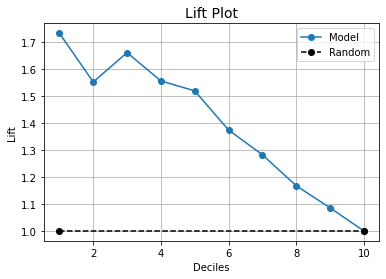

In [31]:
import kds
kds.metrics.plot_lift(y_test, y_pred)